In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)

In [124]:
sales= np.array([50,75,88,107,120,130,150])
price=np.array([7.5, 6,5.8,5,4.5,4.0,3.7])
ad_cost=np.array([28,32,35,40,45,50,56])

A= pd.DataFrame({'sales':[50,70,88,112,120,135,150], 'price':[7.5, 6,5.8,5,4.5,4.0,3.7], 'ad_cost':[35,40,45,50,55,68,75]})


In [125]:
A

,sales,price,ad_cost
0,50,7.5,35
1,70,6.0,40
2,88,5.8,45
3,112,5.0,50
4,120,4.5,55
5,135,4.0,68
6,150,3.7,75


In [126]:
X=A[["price","ad_cost"]]
Y=A[["sales"]]


In [127]:
model= LinearRegression()

model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
model.intercept_, model.coef_[0]

(array([150.3469432]), array([-17.70648072,   0.8664618 ]))

In [129]:
# as price decreases (beta 1= -13.62) our sales increase
# beta 2 = 1.64, means if we spend on advertising our sales would increase

In [130]:
new_col= A['price']*A['ad_cost']

In [131]:
A["Adv_cost"]=new_col

In [132]:
A

,sales,price,ad_cost,Adv_cost
0,50,7.5,35,262.5
1,70,6.0,40,240.0
2,88,5.8,45,261.0
3,112,5.0,50,250.0
4,120,4.5,55,247.5
5,135,4.0,68,272.0
6,150,3.7,75,277.5


In [133]:
A

,sales,price,ad_cost,Adv_cost
0,50,7.5,35,262.5
1,70,6.0,40,240.0
2,88,5.8,45,261.0
3,112,5.0,50,250.0
4,120,4.5,55,247.5
5,135,4.0,68,272.0
6,150,3.7,75,277.5


In [134]:
y_predict= model.predict(X)

In [135]:
y_predict

array([[ 47.87450094],
       [ 78.76653104],
       [ 86.64013621],
       [105.1376298 ],
       [118.32317918],
       [138.44042299],
       [149.81759983]])

In [136]:
A["sales_predict"]=y_predict

In [137]:
#rmse, the average error of our model is 3.99
np.sqrt(np.sum((Y-y_predict)**2/len(Y)))

sales    4.55118
dtype: float64

In [138]:
A

,sales,price,ad_cost,Adv_cost,sales_predict
0,50,7.5,35,262.5,47.874501
1,70,6.0,40,240.0,78.766531
2,88,5.8,45,261.0,86.640136
3,112,5.0,50,250.0,105.137630
4,120,4.5,55,247.5,118.323179
5,135,4.0,68,272.0,138.440423
6,150,3.7,75,277.5,149.817600


In [139]:
Y-y_predict

,sales
0,2.125499
1,-8.766531
2,1.359864
3,6.862370
4,1.676821
5,-3.440423
6,0.182400


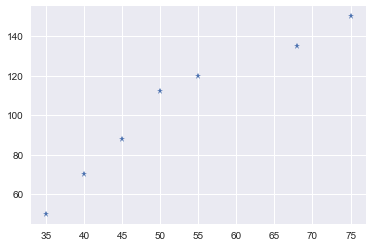

In [140]:
plt.plot(A['ad_cost'], A['sales'], '*')

In [141]:
np.corrcoef(A['ad_cost'], A['sales'])

array([[1.       , 0.9631589],
       [0.9631589, 1.       ]])

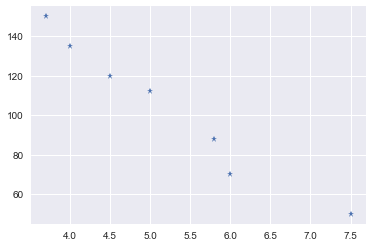

In [142]:
plt.plot(A['price'], A['sales'], '*')

In [143]:
np.corrcoef(A['price'], A['sales'])

array([[ 1.        , -0.98266754],
       [-0.98266754,  1.        ]])

In [144]:
model.intercept_

array([150.3469432])

In [145]:
model.coef_

array([[-17.70648072,   0.8664618 ]])

In [146]:
model.score(X,Y)

0.981227597252123

In [147]:
model2= LinearRegression()

In [148]:
X2= A[["price", 'ad_cost', 'Adv_cost']]

In [149]:
model2.fit(X2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
model2.intercept_

array([133.78716655])

In [151]:
model2.coef_


array([[-27.01700412,  -0.20744374,   0.47000816]])

In [152]:
y2_predict=model2.predict(X2)
y2_predict

array([[ 47.27624776],
       [ 76.18935156],
       [ 90.42570513],
       [105.83199994],
       [117.1282629 ],
       [139.45519637],
       [148.69323634]])

In [153]:
rmse= np.sqrt(np.sum((Y-y2_predict)**2/len(Y)))
rmse

sales    4.13104
dtype: float64

In [ ]:
#ad=100 lacs

### Interaction with Categorical Variable

In [154]:
B= pd.DataFrame({'Experience': [2.5, 3, 5.7, 4.8, 7, 12, 8], 'Gender':[1,0,1,0,0,1,0], 'Income': [6500, 8000, 4000, 12000, 10000, 15000, 6000]    })

In [156]:
B


,Experience,Gender,Income
0,2.5,1,6500
1,3.0,0,8000
2,5.7,1,4000
3,4.8,0,12000
4,7.0,0,10000
5,12.0,1,15000
6,8.0,0,6000


In [162]:
X=B[['Experience', 'Gender']]
Y=B[['Income']]


In [163]:
m1=LinearRegression()
m1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
y1_predict=m1.predict(X)

In [165]:
y1_predict

array([[ 5640.4109589 ],
       [ 7176.16761946],
       [ 7801.99007658],
       [ 8392.05587315],
       [ 9878.14151656],
       [12057.59896451],
       [10553.63499083]])

In [166]:
C= pd.DataFrame({'Experience': [2.5, 3, 5.7, 4.8, 7, 12, 8], 'Gender':[0,1,0,1,1,0,1], 'Income': [6500, 8000, 4000, 12000, 10000, 15000, 6000]    })

In [167]:
X1=C[['Experience', 'Gender']]
Y1=C[['Income']]

In [168]:
m2=LinearRegression()
m2.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
y2_predict=m2.predict(X1)

In [170]:
y2_predict

array([[ 5640.4109589 ],
       [ 7176.16761946],
       [ 7801.99007658],
       [ 8392.05587315],
       [ 9878.14151656],
       [12057.59896451],
       [10553.63499083]])

In [171]:
new_col=B['Experience']*B['Gender']
new_col

0     2.5
1     0.0
2     5.7
3     0.0
4     0.0
5    12.0
6     0.0
dtype: float64

In [175]:
B['exp:g']= new_col
B

,Experience,Gender,Income,exp:g
0,2.5,1,6500,2.5
1,3.0,0,8000,0.0
2,5.7,1,4000,5.7
3,4.8,0,12000,0.0
4,7.0,0,10000,0.0
5,12.0,1,15000,12.0
6,8.0,0,6000,0.0


In [176]:
X2=B[['Experience', 'Gender', 'exp:g']]


m3= LinearRegression()
m3.fit(X2, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
y3_predict=m3.predict(X2)

In [178]:
y3_predict

array([[ 4210.19403624],
       [10002.65251989],
       [ 7452.88200885],
       [ 9334.21750663],
       [ 8517.24137931],
       [13836.92395492],
       [ 8145.88859416]])

In [184]:
m3.intercept_

array([11116.71087533])

In [185]:
m3.coef_

array([[ -371.35278515, -9439.86681769,  1384.69277659]])

In [179]:
new_col2=C['Experience']*C['Gender']


In [193]:
C['exp:g']= new_col2
C

,Experience,Gender,Income,exp:g
0,2.5,0,6500,0.0
1,3.0,1,8000,3.0
2,5.7,0,4000,0.0
3,4.8,1,12000,4.8
4,7.0,1,10000,7.0
5,12.0,0,15000,0.0
6,8.0,1,6000,8.0


In [194]:
X3=C[['Experience', 'Gender', 'exp:g']]
X3

,Experience,Gender,exp:g
0,2.5,0,0.0
1,3.0,1,3.0
2,5.7,0,0.0
3,4.8,1,4.8
4,7.0,1,7.0
5,12.0,0,0.0
6,8.0,1,8.0


In [195]:
m4= LinearRegression()
m4.fit(X3, Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [196]:
y4_predict=m4.predict(X3)

In [197]:
y4_predict

array([[ 4210.19403624],
       [10002.65251989],
       [ 7452.88200885],
       [ 9334.21750663],
       [ 8517.24137931],
       [13836.92395492],
       [ 8145.88859416]])

In [198]:
m4.coef_

array([[ 1013.33999144,  9439.86681769, -1384.69277659]])

In [199]:
m4.intercept_


array([1676.84405764])